In [1]:
import numpy as np
import pandas as pd
import ast
import statsmodels.api as sm
import sqlite3
import datetime

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.colors
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ba_tweets = pd.read_csv('Full datasets/ba_tweets.csv', encoding = 'unicode_escape')
to_ba_tweets = pd.read_csv('Full datasets/to_ba.csv')
ba_convers = pd.read_csv('Full datasets/BAconvers.csv', encoding = 'utf-16')
klm_tweets = pd.read_csv('Full datasets/klm_tweets.csv')
to_klm_tweets = pd.read_csv('Full datasets/to_klm.csv')
klm_convers = pd.read_csv('Full datasets/KLMconvers.csv', encoding = 'utf-16')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def add_dates(df, column : str):
    '''Takes a column with a date, changes this into a datetime object and then substracts all elements of this object and 
    adds them all to seperate columns.'''
    
    df[column] = pd.to_datetime(df[column], errors='coerce')
    
    df['weekday'] = df[column].dt.weekday
    df['hour'] = df[column].dt.hour
    df['month'] = df[column].dt.month
    df['year'] = df[column].dt.year
    df['day'] = df[column].dt.day
    
    df_ints = df.dropna(subset=['day', 'hour']).astype({'day':int, 'hour':int})
    
    return(df_ints)

In [4]:
ba_tweets = add_dates(ba_tweets, 'created_at')
to_ba_tweets = add_dates(to_ba_tweets, 'created_at')
ba_convers = add_dates(ba_convers, 'created_at')
klm_tweets = add_dates(klm_tweets, 'created_at')
to_klm_tweets = add_dates(to_klm_tweets, 'created_at')
klm_convers = add_dates(klm_convers, 'created_at')

In [ ]:
def to_matrix(df):
    '''Groups the data in the given dataset by day and hour, counts the values per hour of the day and converts these values
    into a matrix.'''
    
    df_grouped = df.groupby(['hour', 'day']).count().reset_index()
    df_matrix = df_grouped.pivot('hour', 'day', 'text')
    df_matrix_clean = df_matrix.fillna(0)
    
    return(df_matrix_clean)

In [ ]:
ba_tweets_matrix = to_matrix(ba_tweets)

ax_1 = sns.heatmap(ba_tweets_matrix)
ax_1.set_title('Tweets sent by BA per hour of the day', size=16, weight='bold')
ax_1.set_ylabel('Hour of the day')
ax_1.set_xlabel('Day');

In [ ]:
to_ba_tweets_matrix = to_matrix(to_ba_tweets)

ax_2 = sns.heatmap(to_ba_tweets_matrix)
ax_2.set_title('Tweets sent to BA per hour of the day', size=16, weight='bold')
ax_2.set_ylabel('Hour of the day')
ax_2.set_xlabel('Day');

In [ ]:
ba_convers_matrix = to_matrix(ba_convers)

ax_3 = sns.heatmap(ba_convers_matrix)
ax_3.set_title('Conversations of BA per hour of the day', size=16, weight='bold')
ax_3.set_ylabel('Hour of the day')
ax_3.set_xlabel('Day');

In [ ]:
klm_tweets_matrix = to_matrix(klm_tweets)

ax_4 = sns.heatmap(klm_tweets_matrix)
ax_4.set_title('Tweets sent by KLM per hour of the day', size=16, weight='bold')
ax_4.set_ylabel('Hour of the day')
ax_4.set_xlabel('Day');

In [ ]:
to_klm_tweets_matrix = to_matrix(to_klm_tweets)

ax_5 = sns.heatmap(to_ba_tweets_matrix)
ax_5.set_title('Tweets sent to KLM per hour of the day', size=16, weight='bold')
ax_5.set_ylabel('Hour of the day')
ax_5.set_xlabel('Day');

In [ ]:
klm_convers_matrix = to_matrix(klm_convers)

ax_6 = sns.heatmap(ba_convers_matrix)
ax_6.set_title('Conversations of KLM per hour of the day', size=16, weight='bold')
ax_6.set_ylabel('Hour of the day')
ax_6.set_xlabel('Day');

In [ ]:
ba_tweets['Airline'] = 'BA'
klm_tweets['Airline'] = 'KLM'
to_ba_tweets['Airline'] = 'BA'
to_klm_tweets['Airline'] = 'KLM'
ba_convers['Airline'] = 'BA'
klm_convers['Airline'] = 'KLM'

In [ ]:
by_klm_ba_tweets = pd.concat([ba_tweets, klm_tweets])
by_tweets_grouped = by_klm_ba_tweets.groupby(['hour','Airline']).count().reset_index()

by_tweets_matrix = by_tweets_grouped.pivot('hour', 'Airline','text')
by_tweets_matrix = by_tweets_matrix.fillna(0)

fig1, ax_7 = plt.subplots(figsize=(11, 7))
sns.heatmap(by_tweets_matrix, linewidths=.5)
ax_7.set_title('Tweets sent by BA and KLM compared per hour of the day', size=16, weight='bold');
ax_7.set_ylabel('Hour of the day');

In [ ]:
to_klm_ba_tweets = pd.concat([to_ba_tweets, to_klm_tweets])
to_tweets_grouped = to_klm_ba_tweets.groupby(['hour','Airline']).count().reset_index()

to_tweets_matrix = to_tweets_grouped.pivot('hour', 'Airline','text')
to_tweets_matrix = to_tweets_matrix.fillna(0)

fig2, ax_8 = plt.subplots(figsize=(11, 7))
sns.heatmap(to_tweets_matrix, linewidths=.5)
ax_8.set_title('Tweets sent to BA and KLM compared per hour of the day', size=16, weight='bold');
ax_8.set_ylabel('Hour of the day');

In [ ]:
ax_8.get_figure().savefig('To KLM or BA per hour.png')

In [ ]:
klm_ba_convers = pd.concat([ba_convers, klm_convers])
tweets_convers_grouped = klm_ba_convers.groupby(['hour','Airline']).count().reset_index()

tweets_convers_matrix = tweets_convers_grouped.pivot('hour', 'Airline','text')
tweets_convers_matrix = tweets_convers_matrix.fillna(0)

fig3, ax_9 = plt.subplots(figsize=(11, 7))
sns.heatmap(tweets_convers_matrix, linewidths=.5)
ax_9.set_title('Conversations for BA and KLM compared per hour of the day', size=16, weight='bold');
ax_9.set_ylabel('Hour of the day');

In [ ]:
ax_9.get_figure().savefig('Conversation KLM and BA per hour.png')

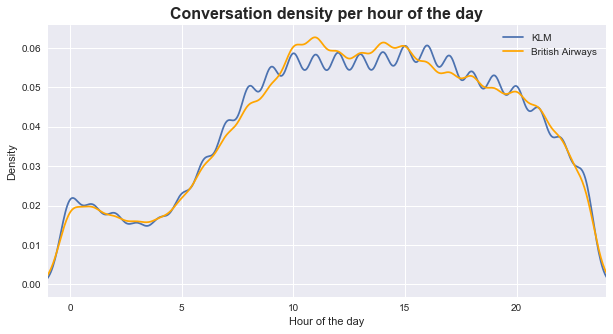

In [11]:
ax_10 = ba_convers['hour'].plot(kind='density')
klm_convers['hour'].plot(kind='density', ax=ax_10, color='orange')
ax_10.set_xlim(-1,24)
ax_10.set_xlabel('Hour of the day')
ax_10.set_title('Conversation density per hour of the day', size=16, weight='bold')
ax_10.legend(['KLM', 'British Airways']);

In [12]:
ax_10.get_figure().savefig('Conversation density per hour.png')